# map plotting

This notebook is intended to be used to inspect and plot healpix maps. 

In [1]:
%matplotlib inline
import os,sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy.io import fits
import fitsio
from astropy.io.fits.hdu.hdulist import HDUList
import healpy as hp
from descolors import BAND_COLORS

matplotlib.style.use('des_dr1')
workdir = '/Users/nsevilla/y3gold-paper/figs/'
datadir = '/Users/nsevilla/des/masks/'

In [2]:
#load Alex's skymap utilities
import skymap
from skymap import Skymap,McBrydeSkymap,OrthoSkymap
from skymap import SurveySkymap,SurveyMcBryde,SurveyOrtho
from skymap import DESSkymap

SKYMAPS = [Skymap,McBrydeSkymap,OrthoSkymap]
SURVEYS = [SurveySkymap,SurveyMcBryde,SurveyOrtho]


In [3]:
plt.rcParams['axes.labelsize'] = 60
plt.rcParams['axes.titlesize'] = 60
plt.rcParams['xtick.labelsize'] = 40
plt.rcParams['ytick.labelsize'] = 40
plt.rcParams['lines.linewidth'] = 3

In [4]:
NSIDE = 4096
pixarea = hp.nside2pixarea(NSIDE,degrees=True)

### Footprint Maps

In [17]:
footprints = []
data_files = []
data_files.append(datadir+'y3a2_footprint_griz_1exp_v2.0.fits.gz')
data_files.append(datadir+'y1a1_gold_1.0.2_wide+d04_footprint_4096.fit')
data_files.append(datadir+'sva1_gold_1.0.4_goodregions_04_equ_nest_4096.fits')
#data_files.append('/Users/nsevilla/Downloads/mask_pilot_survey_10fields_nside256.fits')
for file in data_files:
    footprints.append(fitsio.read(file,ext=1)['I'].ravel())
#footprints.append(fitsio.read('/Users/nsevilla/Downloads/mask_pilot_survey_10fields_nside256.fits',ext=1)['T'].ravel())

0


/anaconda2/envs/skymap/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


1


/anaconda2/envs/skymap/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


2


/anaconda2/envs/skymap/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


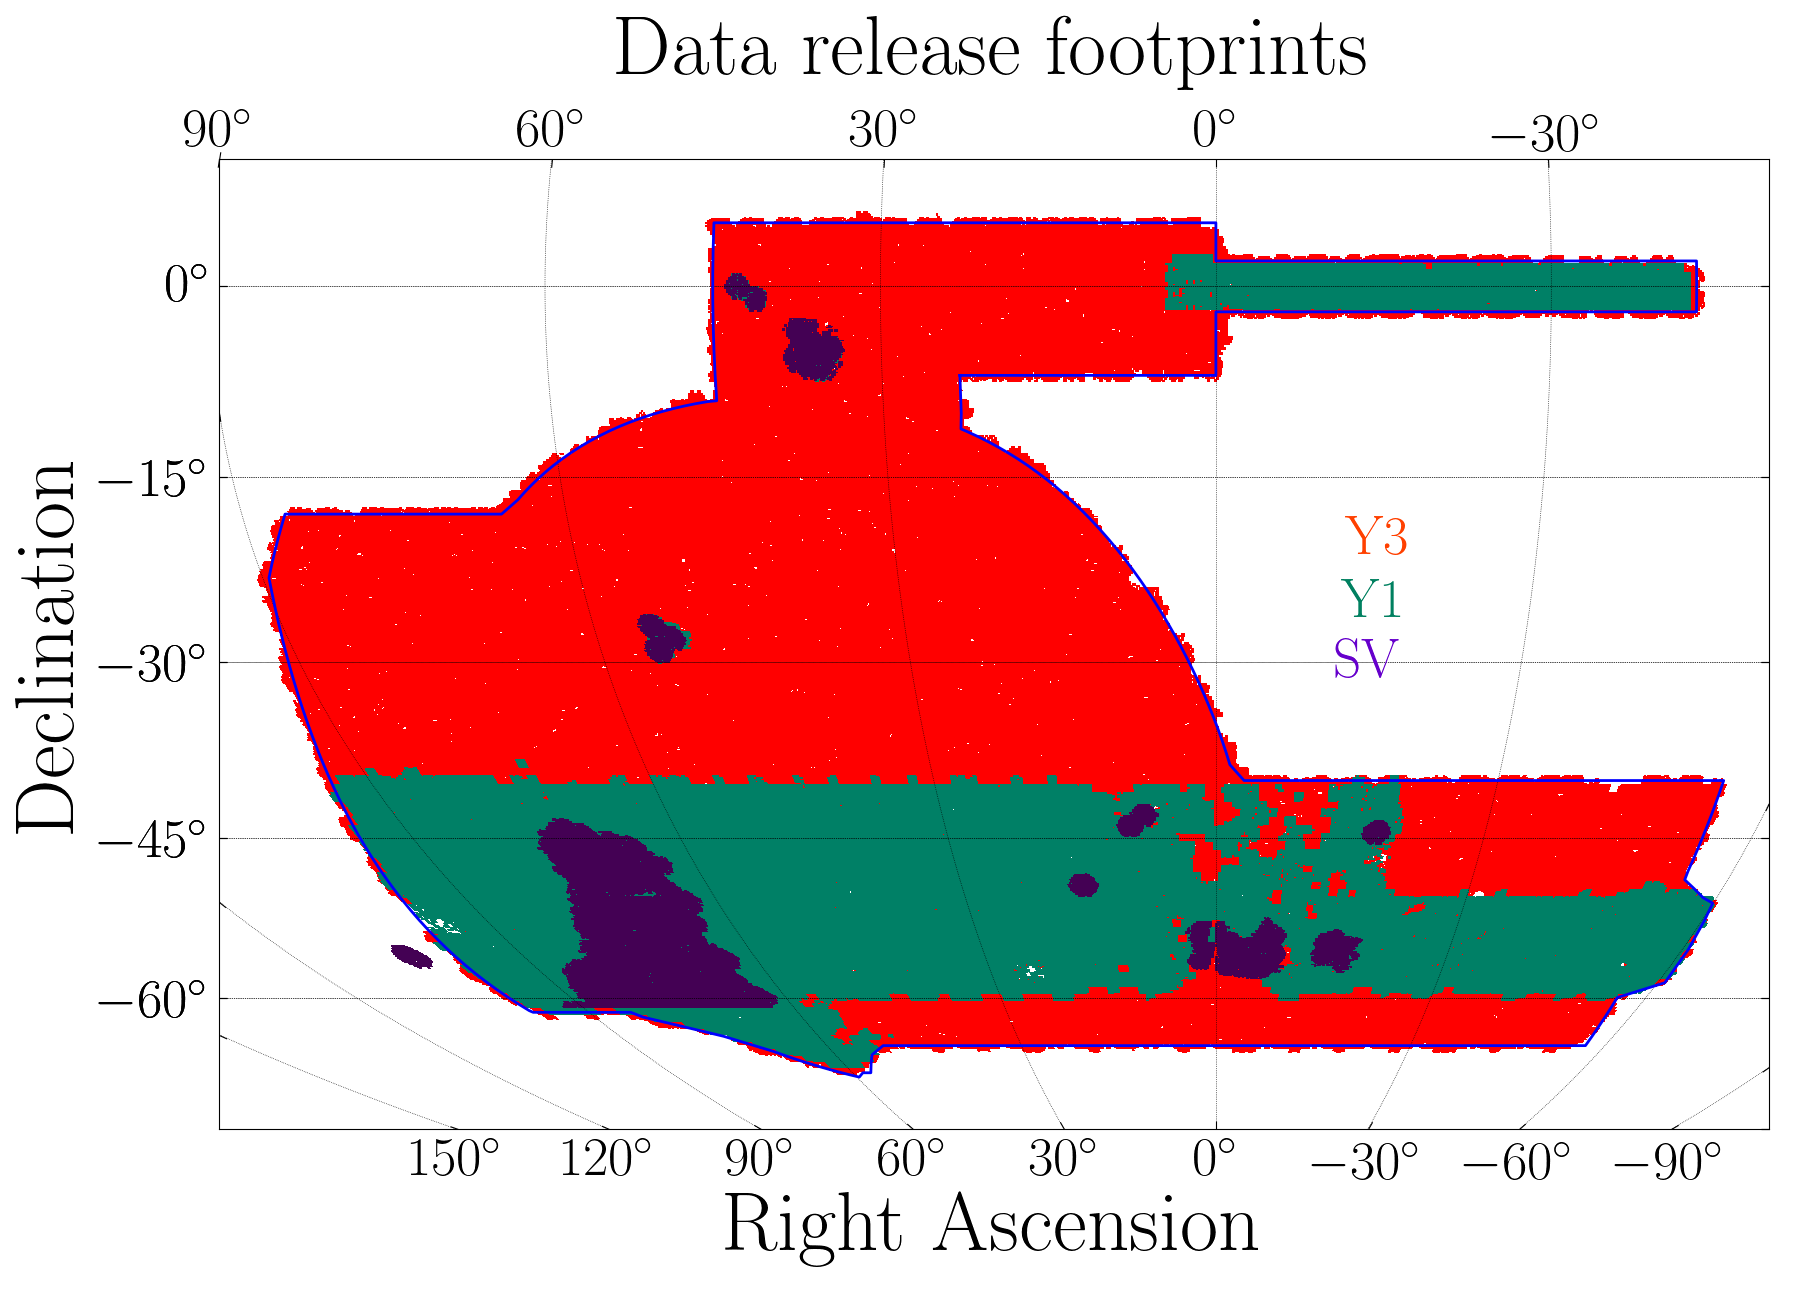

In [19]:
#cmaps = ['Spectral','summer','seismic']#,'spring']
cmaps = ['autumn','summer','viridis']#,'spring']
labels = ['Y3','Y1','SV']#,'ASKAP Pilot']

plt.figure(figsize=(20,15))
smap = DESSkymap() 
smap.draw_des()
plt.title('Data release footprints',y=1.08)

for f,foot in enumerate(footprints):
    print(f)
    mask, = np.where(foot>0)
    if f<3:
        mapdata_tmp = hp.UNSEEN*np.ones(hp.nside2npix(NSIDE))
    else:
        mapdata_tmp = hp.UNSEEN*np.ones(hp.nside2npix(256))
    mapdata_tmp[mask] = 1.0
    if f==0 or f==2:
        mapdata = hp.reorder(mapdata_tmp,n2r = True)
    else:
        mapdata = mapdata_tmp
    #if f>1:
    smap.draw_hpxmap(mapdata,xsize=1000,cmap=cmaps[f],label=labels[f])
    #plt.xlabel('Right Ascension',labelpad=2000000)
    #plt.savefig(workdir+'map_foreground_2.1_bit_all_test.png')

proj = smap.proj(-15,-20)
plt.text(proj[0],proj[1], 'Y3', weight='bold',
         fontsize=40, ha='center', va='center', color=BAND_COLORS['r'])
proj = smap.proj(-15,-25)
plt.text(proj[0],proj[1], 'Y1', weight='bold',
         fontsize=40, ha='center', va='center', color=BAND_COLORS['g'])
proj = smap.proj(-15,-30)
plt.text(proj[0],proj[1], 'SV', weight='bold',
         fontsize=40, ha='center', va='center', color=BAND_COLORS['z'])
#proj = smap.proj(-26,-35)
#plt.text(proj[0],proj[1], 'ASKAP Pilot', weight='bold',
#         fontsize=40, ha='center', va='center', color='magenta')


plt.savefig(workdir+'footprints_test.pdf')
plt.savefig(workdir+'footprints_test.png')

### Foreground Maps

In [10]:
print(mapdata_nest)
print(np.max(mapdata_nest))

[0 0 0 ... 0 0 0]
89


/anaconda2/envs/skymap/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


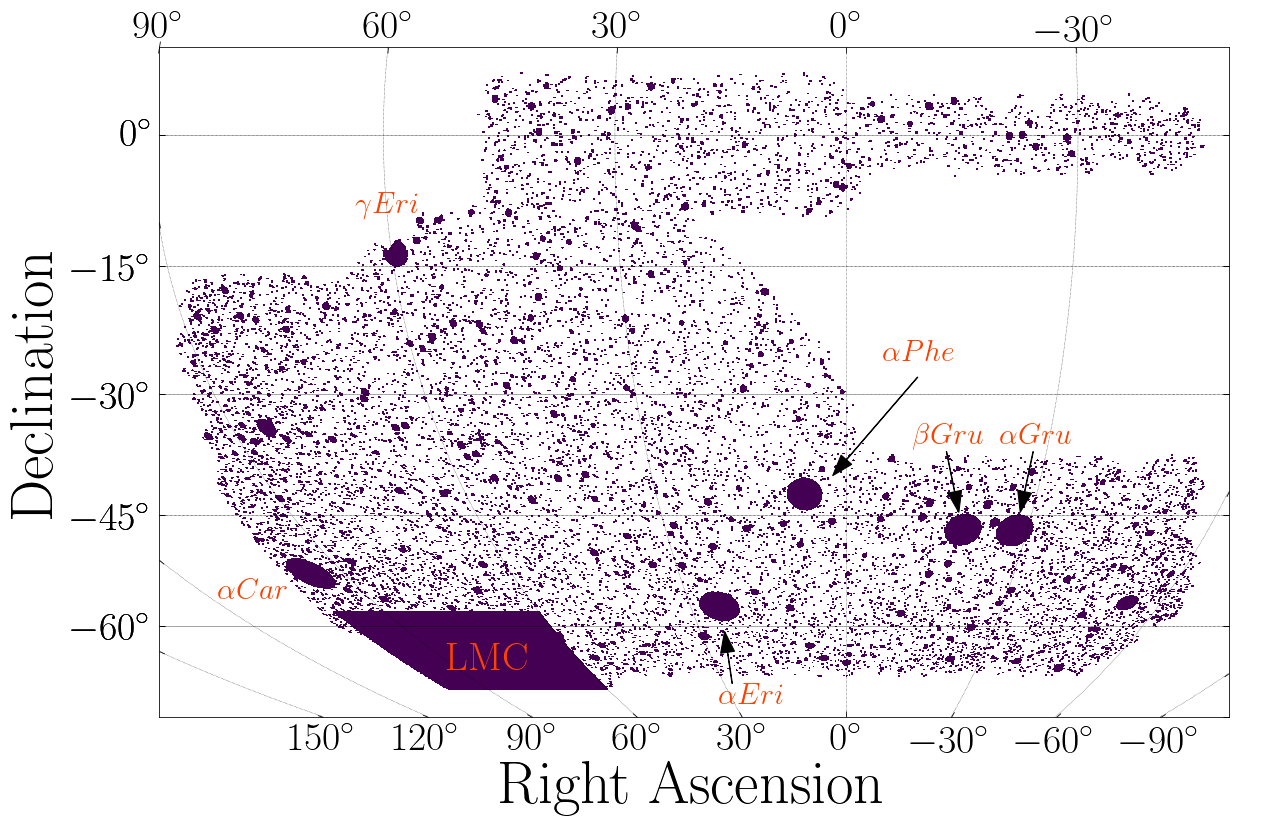

In [33]:
plt.figure(figsize=(20,12))
mapdata_nest = fitsio.read(datadir+'y3a2_foreground_mask_v2.1.fits',ext=1)['I'].ravel()
#bit = 64
#mask, = np.where(np.bitwise_and(mapdata_nest.astype(int),bit)>0)

smap = DESSkymap() 
## the following version allows different colors for each map
#cmaps = ['winter','viridis']#,'summer','autumn','spring','autumn']
#vals = [2,4,8,16,32,64]
#smap = DESSkymap() 
#for i in range(len(vals)):
#    mask, = np.where(mapdata_nest==vals[i])
#    mapdata_tmp = hp.UNSEEN*np.ones(hp.nside2npix(NSIDE))
#    mapdata_tmp[mask] = vals[i]
#    print(len(mapdata_tmp[mask])*pixarea)
#    mapdata = hp.reorder(mapdata_tmp,n2r = True)
#    smap.draw_hpxmap(mapdata,xsize=1000,cmap=cmaps[i])

mask, = np.where(mapdata_nest>1)
#mapdata_tmp = np.zeros(len(mapdata_nest))
mapdata_tmp = hp.UNSEEN*np.ones(hp.nside2npix(NSIDE))
mapdata_tmp[mask] = 1 #vals[i]
mapdata = hp.reorder(mapdata_tmp,n2r = True)
#hpxmap,(im,ra,dec,values) = smap.draw_hpxbin(ra,dec,nside=4096,xsize=3000)
smap.draw_hpxmap(mapdata,xsize=1000)

proj = smap.proj(80,-65)
plt.text(proj[0],proj[1], 'LMC', weight='bold',
         fontsize=40, ha='center', va='center', color=BAND_COLORS['r'])
proj = smap.proj(350,-25)
plt.text(proj[0],proj[1], r'$\alpha Phe$', fontweight='bold',
         fontsize=30, ha='center', va='center', color=BAND_COLORS['r'])
proj1 = smap.proj(350,-28)
proj2 = smap.proj(0,-38)
plt.arrow(proj1[0][0],proj1[1][0],(proj2[0]-proj1[0])[0],(proj2[1]-proj1[1])[0],lw=1, \
          head_width=0.03, color='black')

proj = smap.proj(24.4,-71)
plt.text(proj[0],proj[1], r'$\alpha Eri$', fontweight='bold',
         fontsize=30, ha='center', va='center', color=BAND_COLORS['r'])
proj1 = smap.proj(28,-69)
proj2 = smap.proj(26,-64)
plt.arrow(proj1[0][0],proj1[1][0],(proj2[0]-proj1[0])[0],(proj2[1]-proj1[1])[0],lw=1, \
          head_width=0.03, color='black')

proj = smap.proj(59.9,-8)
plt.text(proj[0],proj[1], r'$\gamma Eri$', fontweight='bold',
         fontsize=30, ha='center', va='center', color=BAND_COLORS['r'])
proj = smap.proj(110,-55)
plt.text(proj[0],proj[1], r'$\alpha Car$', fontweight='bold',
         fontsize=30, ha='center', va='center', color=BAND_COLORS['r'])

proj = smap.proj(332,-35)
plt.text(proj[0],proj[1], r'$\alpha Gru$', fontweight='bold',
         fontsize=30, ha='center', va='center', color=BAND_COLORS['r'])
proj1 = smap.proj(332,-37)
proj2 = smap.proj(332,-42)
plt.arrow(proj1[0][0],proj1[1][0],(proj2[0]-proj1[0])[0],(proj2[1]-proj1[1])[0],lw=1, \
          head_width=0.03, color='black')

proj = smap.proj(345,-35)
plt.text(proj[0],proj[1], r'$\beta Gru$', fontweight='bold',
         fontsize=30, ha='center', va='center', color=BAND_COLORS['r'])
proj1 = smap.proj(345,-37)
proj2 = smap.proj(343,-42)
plt.arrow(proj1[0][0],proj1[1][0],(proj2[0]-proj1[0])[0],(proj2[1]-proj1[1])[0],lw=1, \
          head_width=0.03, color='black')

#smap.draw_inset_colorbar(fontsize=30)
#smap.draw_des()
#plt.title('Gold 2.2 foreground map',y=1.08)
plt.xlabel('Right Ascension')
#plt.savefig(workdir+'map_foreground_2.1_bit_all_test.png')
plt.savefig(workdir+'map_foreground_2.1_bit_all_wstarlabels.pdf')

In [6]:
print(len(mapdata_tmp[mask])*pixarea)

573.7865019828208


In [ ]:
tttt